In [1]:
import mysql.connector

In [2]:
#establishing connection between SQL database and jupyter notebook
mydb = mysql.connector.connect(
host = "172.31.37.112",
user = "capital_user",
password = "N@ewGi453@2",
db = "capital_v2"
)


In [3]:
print(mydb.is_connected())

True


In [4]:
#creating cursor for SQL
cur = mydb.cursor()

In [5]:
cur.execute("SELECT * FROM `raw_kpi_data` WHERE `sector_code` LIKE '%FINS%' AND `kpi_code` LIKE '%wat-2%' LIMIT 5000")

In [6]:
data = cur.fetchall()

In [7]:
sequence = cur.column_names

In [8]:
sequence

('id',
 'kpi_code',
 'company_code',
 'location_code',
 'reporting_year',
 'reporting_unit',
 'raw_data',
 'raw_unit',
 'converted_data',
 'converted_unit',
 'page_url',
 'reference',
 'sector_code',
 'source_code',
 'capital_code',
 'reference_key',
 'publish_date',
 'accounting_period_start',
 'accounting_period_end',
 'created_at',
 'updated_at',
 'updated_by')

In [9]:
data

[(560728,
  'Wat-2',
  'JPMORG00001',
  'USA',
  '2018',
  None,
  '5731976',
  'm3',
  '5731980',
  'm3',
  'https://validator.gistimpact.com/admin/validator/validate/27035/34/ee33dc5e-9229-45c5-83c1-e1bef7d19372',
  'JPMORG00001_2019_S017',
  'FINS',
  'S017',
  'ncx',
  'API-27035',
  None,
  None,
  None,
  datetime.datetime(2020, 12, 21, 11, 37, 47),
  datetime.datetime(2020, 12, 21, 11, 37, 47),
  10),
 (561689,
  'Wat-2',
  'CITIGR00001',
  'USA',
  '2018',
  None,
  '4526519',
  'm3',
  '4526520',
  'm3',
  'https://validator.gistimpact.com/admin/validator/validate/18331/84/ef667a68-639a-435e-9fb8-214ab9fe7305',
  'CITIGR00001_2019_S017',
  'FINS',
  'S017',
  'ncx',
  'API-18331',
  None,
  None,
  None,
  datetime.datetime(2021, 4, 27, 12, 58, 43),
  datetime.datetime(2021, 4, 30, 18, 9, 40),
  10),
 (562433,
  'Wat-2',
  'ROYALB00001',
  'CAN',
  '2018',
  None,
  '667341.9',
  'm3',
  '667341.9',
  'm3',
  'https://validator.gistimpact.com/admin/validator/validate/26919/68/

In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import cufflinks as cf
import matplotlib.pyplot as plt


In [11]:
pd.DataFrame(data, columns = sequence)

,id,kpi_code,company_code,location_code,reporting_year,reporting_unit,raw_data,raw_unit,converted_data,converted_unit,...,sector_code,source_code,capital_code,reference_key,publish_date,accounting_period_start,accounting_period_end,created_at,updated_at,updated_by
0,560728,Wat-2,JPMORG00001,USA,2018,None,5731976,m3,5731980,m3,...,FINS,S017,ncx,API-27035,None,None,None,2020-12-21 11:37:47,2020-12-21 11:37:47,10.0
1,561689,Wat-2,CITIGR00001,USA,2018,None,4526519,m3,4526520,m3,...,FINS,S017,ncx,API-18331,None,None,None,2021-04-27 12:58:43,2021-04-30 18:09:40,10.0
2,562433,Wat-2,ROYALB00001,CAN,2018,None,667341.9,m3,667341.9,m3,...,FINS,S017,ncx,API-26919,None,None,None,2020-12-21 19:15:34,2022-04-19 11:57:27,NaN
3,562681,Wat-2,TORONT00001,CAN,2018,None,1241915,m3,1241920,m3,...,FINS,S005,ncx,API-26845,None,None,None,2020-12-21 10:33:42,2020-12-21 10:33:42,10.0
4,562898,Wat-2,ALLIAN00001,DEU,2018,None,1830782,m³,1830782,m3,...,FINS,S027,ncx,API-26579,None,None,None,2020-12-30 10:04:04,2022-04-14 15:20:48,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,33381812,Wat-2,WUSTEN00001,DEU,2017,None,64075,m3,64075,m3,...,FINS,S027,ncx,API-156859,None,None,None,2023-05-26 08:31:53,NaT,NaN
2221,33381826,Wat-2,WUSTEN00001,DEU,2019,None,60781,m3,60781,m3,...,FINS,S027,ncx,API-156857,None,None,None,2023-05-26 08:32:04,NaT,NaN
2222,33381841,Wat-2,WUSTEN00001,DEU,2018,None,62417,m3,62417,m3,...,FINS,S027,ncx,API-156855,None,None,None,2023-05-26 08:32:15,NaT,NaN
2223,33381854,Wat-2,WUSTEN00001,DEU,2020,None,46863,m3,46863,m3,...,FINS,S027,ncx,API-156851,None,None,None,2023-05-26 08:32:34,NaT,NaN


In [12]:
df = pd.DataFrame(data, columns = sequence)

In [13]:
#df[["converted_data"]]

In [14]:
df = df.astype({'converted_data': 'float'})

In [15]:
df["converted_data"].dtypes

dtype('float64')

In [16]:
cf.go_offline()
df[["converted_data"]].iplot(kind = 'scatter')

In [17]:
df["converted_data"].describe()

count    2.225000e+03
mean     1.122249e+06
std      8.871795e+06
min      0.000000e+00
25%      3.176875e+04
50%      1.240160e+05
75%      3.626230e+05
max      1.481090e+08
Name: converted_data, dtype: float64

In [18]:
df.loc[1860:1870, ['id','company_code','converted_data']]

,id,company_code,converted_data
1860,32455187,ATTICA00002,4400.0
1861,32458836,BANCAT00001,49000.0
1862,32459055,BANKMU00001,41942.0
1863,32459067,BANKMU00001,46778.0
1864,32459068,BANKMU00001,42572.0
1865,32459085,BANKMU00001,20642.0
1866,32459086,BANKMU00001,23643.0
1867,32459087,BANKMU00001,22256.0
1868,32461084,BANCOC00001,163747.0
1869,32461085,BANCOC00001,208817.0


In [19]:
df1 = df.drop(df.index[1862:1868], axis = 0)

In [20]:
df1

,id,kpi_code,company_code,location_code,reporting_year,reporting_unit,raw_data,raw_unit,converted_data,converted_unit,...,sector_code,source_code,capital_code,reference_key,publish_date,accounting_period_start,accounting_period_end,created_at,updated_at,updated_by
0,560728,Wat-2,JPMORG00001,USA,2018,None,5731976,m3,5731980.0,m3,...,FINS,S017,ncx,API-27035,None,None,None,2020-12-21 11:37:47,2020-12-21 11:37:47,10.0
1,561689,Wat-2,CITIGR00001,USA,2018,None,4526519,m3,4526520.0,m3,...,FINS,S017,ncx,API-18331,None,None,None,2021-04-27 12:58:43,2021-04-30 18:09:40,10.0
2,562433,Wat-2,ROYALB00001,CAN,2018,None,667341.9,m3,667341.9,m3,...,FINS,S017,ncx,API-26919,None,None,None,2020-12-21 19:15:34,2022-04-19 11:57:27,NaN
3,562681,Wat-2,TORONT00001,CAN,2018,None,1241915,m3,1241920.0,m3,...,FINS,S005,ncx,API-26845,None,None,None,2020-12-21 10:33:42,2020-12-21 10:33:42,10.0
4,562898,Wat-2,ALLIAN00001,DEU,2018,None,1830782,m³,1830782.0,m3,...,FINS,S027,ncx,API-26579,None,None,None,2020-12-30 10:04:04,2022-04-14 15:20:48,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,33381812,Wat-2,WUSTEN00001,DEU,2017,None,64075,m3,64075.0,m3,...,FINS,S027,ncx,API-156859,None,None,None,2023-05-26 08:31:53,NaT,NaN
2221,33381826,Wat-2,WUSTEN00001,DEU,2019,None,60781,m3,60781.0,m3,...,FINS,S027,ncx,API-156857,None,None,None,2023-05-26 08:32:04,NaT,NaN
2222,33381841,Wat-2,WUSTEN00001,DEU,2018,None,62417,m3,62417.0,m3,...,FINS,S027,ncx,API-156855,None,None,None,2023-05-26 08:32:15,NaT,NaN
2223,33381854,Wat-2,WUSTEN00001,DEU,2020,None,46863,m3,46863.0,m3,...,FINS,S027,ncx,API-156851,None,None,None,2023-05-26 08:32:34,NaT,NaN


In [21]:
df1['converted_data'].iplot()

In [22]:
df1['converted_data'].describe()

count    2.219000e+03
mean     1.125195e+06
std      8.883606e+06
min      0.000000e+00
25%      3.179750e+04
50%      1.246360e+05
75%      3.628535e+05
max      1.481090e+08
Name: converted_data, dtype: float64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='converted_data', ylabel='Density'>

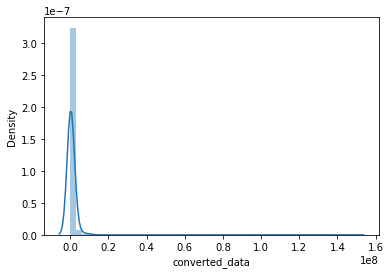

In [23]:
sns.distplot(df1['converted_data'])

import scipy.stats as stats
import matplotlib.pyplot as plt
stats.probplot(df1['converted_data'], dist="norm", plot=plt)
plt.show()

In [24]:
df1['converted_data'].iplot()

In [25]:
#sector check for companies where values are shooting with index filter. 
df1.loc[[24,34,111,488,601,911, 971, 1111, 1562,1626], ['company_code', 'converted_data']]

,company_code,converted_data
24,SOCIET00001,1600000.0
34,JULIUS00001,121764.0
111,NATION00001,492153.0
488,SHINSE00001,1569.0
601,MCBBAN00001,46054.4
911,KBFINA00001,278135.0
971,CHINAB00002,93672.0
1111,CANADI00002,414529.0
1562,VALUEP00001,219.5
1626,MAHIND00002,112642.0


In [26]:
#SUMITO00002 lies in 'conglomerate sector'
df1[df1['company_code']=='SUMITO00002']

,id,kpi_code,company_code,location_code,reporting_year,reporting_unit,raw_data,raw_unit,converted_data,converted_unit,...,sector_code,source_code,capital_code,reference_key,publish_date,accounting_period_start,accounting_period_end,created_at,updated_at,updated_by
26,576352,Wat-2,SUMITO00002,JPN,2019,None,118235911,m3,118235911.0,m3,...,FINS,S017,ncx,API-54485,None,None,None,NaT,2022-10-10 12:12:12,NaN
79,6566899,Wat-2,SUMITO00002,JPN,2018,None,130821214,m3,130821214.0,m3,...,FINS,S017,ncx,API-54485,None,None,None,NaT,2022-10-10 12:12:12,NaN
126,12557446,Wat-2,SUMITO00002,JPN,2017,None,185944,m3,185944.0,m3,...,FINS,S017,ncx,API-54495,None,None,None,2022-04-26 15:33:58,2022-10-10 12:11:56,NaN
531,21628536,Wat-2,SUMITO00002,JPN,2016,None,195753,m3,195753.0,m3,...,FINS,S017,ncx,API-54495,None,None,None,2022-04-26 15:33:58,2022-10-10 12:11:56,NaN
714,21828252,Wat-2,SUMITO00002,JPN,2021,None,93120,Thousand m3,93120000.0,m3,...,FINS,S023,ncx,API-79608,None,None,None,2021-11-02 13:30:37,2022-10-12 08:35:08,10.0
1234,31881931,Wat-2,SUMITO00002,JPN,2022,None,78107,Thousand m3,78107000.0,m3,...,FINS,S023,ncx,API-79608,None,None,None,2022-10-10 11:16:00,2022-10-12 08:35:08,NaN


In [27]:
#Data cleaning: 'SUMITO00002' lies in Conglomerate sector
df2 = df1.drop(df1[(df1['company_code']=='SUMITO00002')].index)

In [28]:
df2['converted_data'].iplot()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='converted_data'>

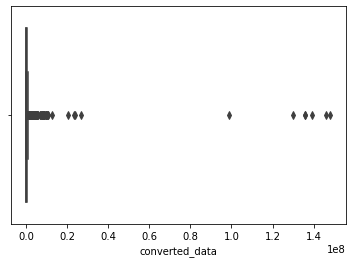

In [29]:
#OutLiers:
#1. using 'box-plot'
sns.boxplot(df2['converted_data'])

In [39]:
#from above observation, the values beyond ~250000 are outliers.
print(np.where(df2['converted_data']>18000000))
# following output gives outlier values.

(array([ 602,  875,  889, 1345, 1358, 1365, 1366, 1367, 1368, 1369, 1370],
      dtype=int64),)


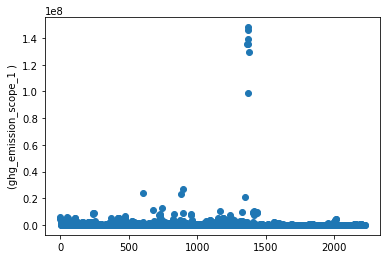

In [31]:
#2. Using Scatterplot:
fig, ax = plt.subplots(figsize = (6,4))
ax.scatter(df2.index,df2['converted_data'])
 
# y-axis label
ax.set_ylabel('(ghg_emission_scope_1 )')
plt.show()

In [32]:
#3. IQR(Inner Quartile Range)
# Calculate the upper and lower limits
Q1 = df1['converted_data'].quantile(0.25)
Q3 = df1['converted_data'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df1['converted_data']>=upper)[0]
lower_array = np.where(df1['converted_data']<=lower)[0]
 
# Removing the outliers
df1.drop(index=upper_array, inplace=True)
df1.drop(index=lower_array, inplace=True)
 
# Print the new shape of the DataFrame
print("New Shape: ", df1.shape)

New Shape:  (1933, 22)


In [33]:
Q1 = df1['converted_data'].quantile(0.25)

In [34]:
Q1

23337.0

In [35]:
Q3

362853.5

In [36]:
Benchmark = IQR/2

In [37]:
Benchmark

165528.0